<a href="https://colab.research.google.com/github/LS10432/PDDS-PYD-0825-06Oct2025B/blob/main/Project/A6/A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# @title
import pandas as pd

# Define the local path and the URL for the covid dataset
local_path = '/content/owid-covid-data.csv'
covid_url = 'https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0825-06Oct2025B+type@asset+block/owid-covid-data.csv'

try:
    # Try to read the Titanic dataset from the local path
    df = pd.read_csv(local_path)
    print(f"Successfully loaded data from {local_path}")
    print("\n")
except FileNotFoundError:
    # If the local file is not found, read the dataset from the URL
    df = pd.read_csv(covid_url)
    print(f"Local file not found. Loading data from {covid_url}")
    print("\n")

print(f"Total number of columns: {df.shape[1]}")
print(f"Total number of rows: {df.shape[0]}")

# Identify and count missing values in each column
print(df.isnull().sum())

# Display columns with missing values and count how many columns have no missing values
missing_cols = df.isnull().sum() != 0
print(f"Number of columns with no missing values: {len(missing_cols) - missing_cols.sum()}")
print(f"Number of columns with missing values: {missing_cols.sum()}")

missing_values_percentage = df.isnull().mean() * 100
columns_to_drop = missing_values_percentage[missing_values_percentage > 90].index.tolist()

print("Columns with more than 90% missing values:")
print(columns_to_drop)

# Print number of columns to be dropped
print(f"Number of columns to be dropped: {len(columns_to_drop)}")
print("Column Names to be dropped:")
print(columns_to_drop)

# Remove columns with more than 90% missing values
df = df.drop(columns=columns_to_drop)

# Print number of columns remaining
print("\n")
print(f"Number of columns after removal: {df.shape[1]}")

# Convert the 'date' column from object type to datetime type
df['date'] = pd.to_datetime(df['date'])

# Print the number of missing values per column before imputation
print("Number of missing values per column before imputation:")
print(df.isnull().sum())

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print (f"Number of columns with numerical value :{len(numerical_cols)}")

# Impute missing values in numerical columns using the mean
for col in numerical_cols:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print (f"Number of columns with non-numerical value :{len(categorical_cols)}")

# Impute missing values in categorical columns using the mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # mode() can return multiple values, take the first
        df[col] = df[col].fillna(mode_val)

# Print the number of remaining missing values per column
print("\nNumber of remaining missing values per column after imputation:")
print(df.isnull().sum())

# Get the number of rows before removing duplicates
rows_before = df.shape[0]
print(f"Number of rows before removing duplicates: {rows_before}")

# Count the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Count the number of unique duplicate rows
unique_duplicate_rows = df[df.duplicated()].shape[0]
print(f"Number of unique duplicate rows: {unique_duplicate_rows}")

# Remove duplicate rows
df = df.drop_duplicates()

# Get the number of rows after removing duplicates
rows_after = df.shape[0]
print(f"Number of rows after removing duplicates: {rows_after}")

# Extract year and month from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Get unique countries from the 'location' column
unique_countries = df['location'].unique()

# Count the number of unique countries
num_unique_countries = len(unique_countries)

# Print the total count of unique countries
print(f"Total number of unique countries: {num_unique_countries}")

# Display the list of unique countries
print("\nList of unique countries:")
print(unique_countries)

Local file not found. Loading data from https://lms.educlaas.com/assets/courseware/v1/e206258dd748e86b8bb35fc039e90fa8/asset-v1:EduCLaSS+PYD+PDDS-PYD-0825-06Oct2025B+type@asset+block/owid-covid-data.csv


Total number of columns: 67
Total number of rows: 358838
iso_code                                        0
continent                                   17108
location                                        0
date                                            0
total_cases                                 38210
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       346627
excess_mortality_cumulative                346627
excess_mortality                           346627
excess_mortality_cumulative_per_million    346627
Length: 67, dtype: int64
Number of columns with no missing values: 4
Number of columns with missing values: 63
Columns with more than 90% missing values:
['weekly_icu_admissions', 'weekly_

Activity 6:
In-Depth Country Analysis Conducting an in-depth examination of specific countries, understanding the correlation between cases and deaths globally, and exploring continental variations in case distribution.
1. Visualize the total COVID-19 cases and deaths over time for a specific country.
2. Get user input for the country and metric (total_cases or total_deaths) and plot a line chart for the user selected values.
3. Analyze the distribution of total cases across different continents using a box plot.
4. Visualize the Year wise monthly trend of new COVID-19 cases for user selected country.

1.

<Axes: xlabel='date', ylabel='total_cases'>

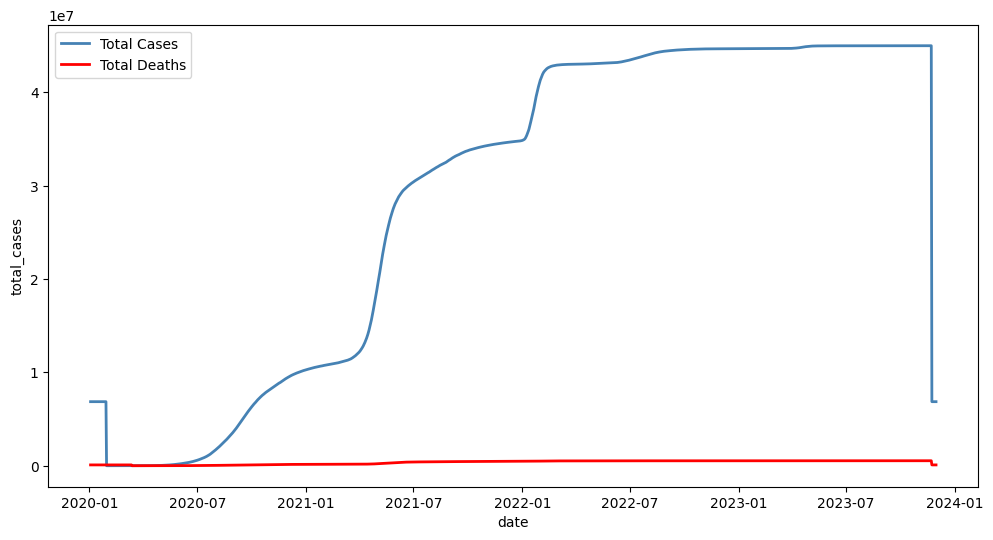

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

country_name = 'India'   # ← change this to your desired country

# Filter dataset for that country
country_df = df[df['location'] == country_name].copy()

# Convert date column to datetime
country_df['date'] = pd.to_datetime(country_df['date'])

#  Plot total cases and deaths over time
plt.figure(figsize=(12,6))

sns.lineplot(data=country_df, x='date', y='total_cases', label='Total Cases', linewidth=2, color='steelblue')
sns.lineplot(data=country_df, x='date', y='total_deaths', label='Total Deaths', linewidth=2, color='red')

2.

enter the country name: Singapore


<Axes: xlabel='date', ylabel='total_cases'>

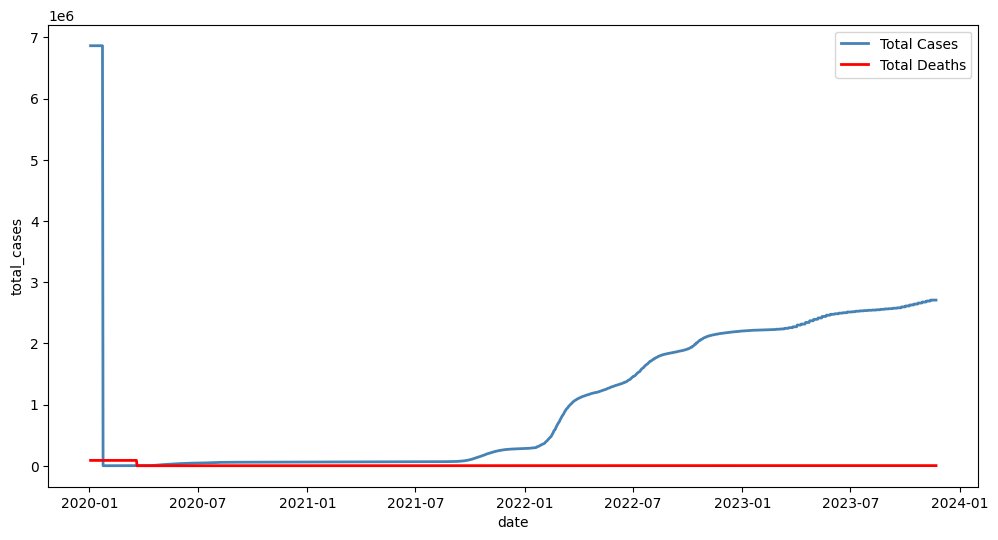

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

country_name=input("enter the country name: ")

# Filter dataset for that country
country_df = df[df['location'] == country_name].copy()

# Convert date column to datetime
country_df['date'] = pd.to_datetime(country_df['date'])

#  Plot total cases and deaths over time
plt.figure(figsize=(12,6))

sns.lineplot(data=country_df, x='date', y='total_cases', label='Total Cases', linewidth=2, color='steelblue')
sns.lineplot(data=country_df, x='date', y='total_deaths', label='Total Deaths', linewidth=2, color='red')

3.

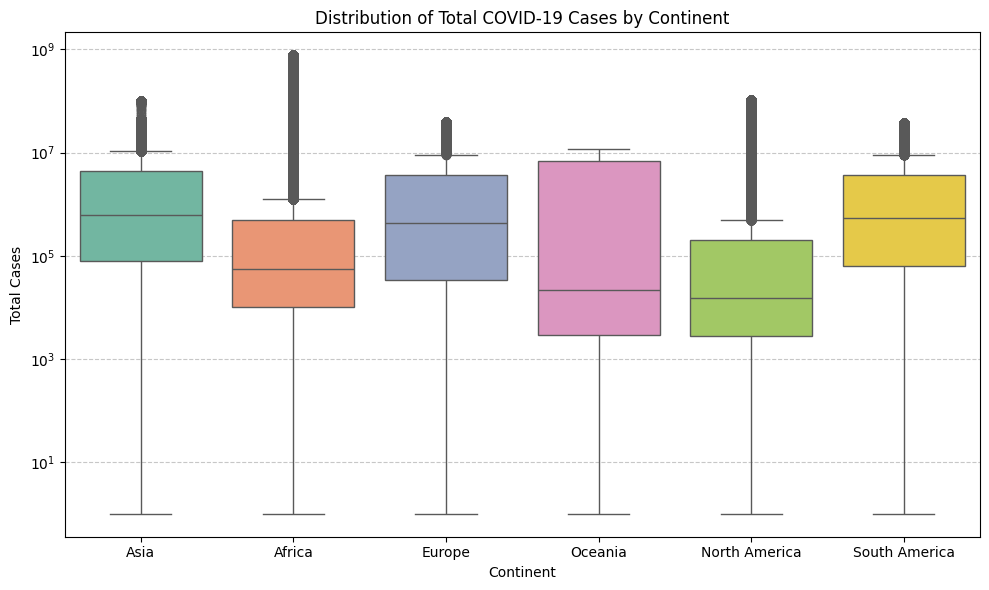

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='continent', y='total_cases', hue='continent', palette='Set2')

# 3️⃣ Add titles and labels
plt.title('Distribution of Total COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.yscale('log')  # Optional: use log scale if values vary widely
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

4.

enter the country name: Singapore


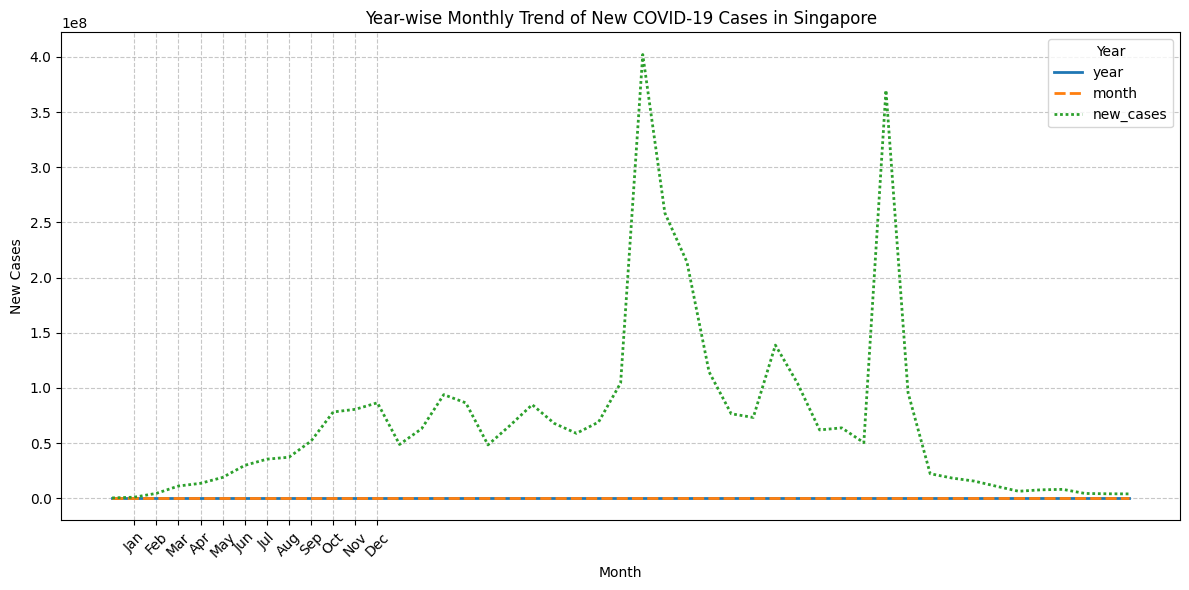

In [22]:
# 6.4. Visualize the Year wise monthly trend of new COVID-19 cases for user's selected country
country_name=input("enter the country name: ")
monthly_cases = df.groupby(['year','month'])['new_cases'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_cases, palette='tab10', linewidth=2)
plt.title(f'Year-wise Monthly Trend of New COVID-19 Cases in {country_name}')
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=45)
plt.legend(title='Year')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()